### OpenAI gym

In [1]:
!apt-get install -y xvfb x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 993 kB in 1s (1,396 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2

In [2]:
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

     |████████████████████████████████| 538 kB 21.1 MB/s 
     |████████████████████████████████| 448 kB 21.9 MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp37-cp37m-linux_x86_64.whl size=1599522 sha256=6f624597c311fe93dfdd56f7fecc3f66869e432457c226494473257342877a42
  Stored in directory: /root/.cache/pip/wheels/1c/f5/6f/169afb3f2d476c5e807f8515b3c9bc9b819c3962316aa804eb
Successfully built PyOpenGL-accelerate


In [3]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [4]:
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, callbacks
import numpy as np
import matplotlib.pyplot as plt

In [5]:
env = gym.make('CartPole-v1')

In [6]:
env.seed(42)
obs = env.reset()
obs

array([-0.01258566, -0.00156614,  0.04207708, -0.00180545])

In [7]:
env.action_space

Discrete(2)

In [8]:
def plot_enviroment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.show()
    print(img.shape)

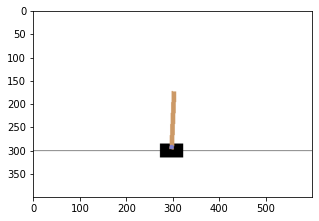

(400, 600, 3)


In [9]:
plot_enviroment(env)

In [10]:
action = 1
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

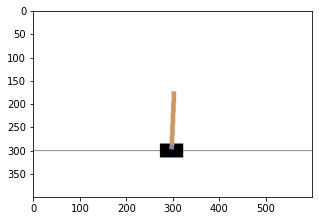

(400, 600, 3)


In [11]:
plot_enviroment(env)

In [12]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

obs_imgs = []
total = []
for episode in range(500):
    episode_reward = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        if done:
            break
    total.append(episode_reward)
    obs_imgs.append(env.render(mode="rgb_array"))

In [13]:
np.mean(total), np.std(total), np.min(total), np.max(total)

(41.684, 8.839917646675222, 24.0, 68.0)

### Neural Network  policies

In [14]:
n_inputs = 4

model = Sequential([
            layers.Dense(5, activation="elu", input_shape=[n_inputs]), 
            layers.Dense(1, activation="sigmoid")
])